In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pandas as pd

In [9]:
class CFG:
    data_dir: str = "../data/HeiChole_data/file/Hei-Chole1_Annotation_Phase.csv"

In [15]:
def video_to_fps(video_id: int):
    if video_id in [16, 17, 18, 19, 20, 23, 24]:
        return 50
    else:
        return 25

In [10]:
train_split = range(1, 18)
valid_split = range(18, 25)
train_split

range(1, 18)

In [11]:
df = pd.read_csv(CFG.data_dir, header=None)

In [12]:
df[1][10]

0

In [13]:
int(os.listdir("../data/HeiChole_data/HeiChole_1")[0].split(".")[0])

63

## Preprocess Action Part

In [16]:
df_train = pd.DataFrame()
df_train["video_id"] = list()
df_train["image_id"] = list()
df_train["phase"] = list()

for i in train_split:
    files = os.listdir(f"../data/HeiChole_data/HeiChole_{i}")

    for file in files:
        df = pd.read_csv(f"../data/HeiChole_data/file/Hei-Chole{i}_Annotation_Phase.csv", header=None)
        id = int(file.split(".")[0])

        frame_id = (id-1) * video_to_fps(i)
        try:
            phase = df[1][frame_id]
        except KeyError:
            print(i, id, frame_id)
        else:
            df_train = df_train.append(
                {
                    "video_id": int(i),
                    "image_id": int(id),
                    "phase": int(phase),
                },
                ignore_index=True,
            )

1 2199 54950
2 2038 50925
3 2881 72000
4 1274 31825
5 3131 78250
6 2890 72225
7 4188 104675
8 1713 42800
9 2690 67225
10 1791 44750
11 1414 35325
12 1792 44775
12 1793 44800
13 1979 49450
14 2132 53275
15 1981 49500
16 3695 184700
16 3696 184750
17 5104 255150


In [17]:
df_train["video_id"] = [int(video_id) for video_id in df_train["video_id"]]
df_train["image_id"] = [int(image_id) for image_id in df_train["image_id"]]
df_train["phase"] = [int(phase) for phase in df_train["phase"]]

In [19]:
df_train.tail()

,video_id,image_id,phase
42870,17,3207,1
42871,17,4568,5
42872,17,2119,1
42873,17,3561,3
42874,17,1376,1


In [31]:
df_train.to_csv("../data/HeiChole_data/train.csv", index=False)

In [21]:
df_valid = pd.DataFrame()
df_valid["video_id"] = list()
df_valid["image_id"] = list()
df_valid["phase"] = list()

for i in valid_split:
    files = os.listdir(f"../data/HeiChole_data/HeiChole_{i}")

    for file in files:
        df = pd.read_csv(f"../data/HeiChole_data/file/Hei-Chole{i}_Annotation_Phase.csv", header=None)
        id = int(file.split(".")[0])

        frame_id = (id-1) * video_to_fps(i)
        try:
            phase = df[1][frame_id]
        except KeyError:
            print(i, id, frame_id)
        else:
            df_valid = df_valid.append(
                {
                    "video_id": int(i),
                    "image_id": int(id),
                    "phase": int(phase),
                },
                ignore_index=True,
            )

18 1554 77650
19 1892 94550
20 1662 83050
20 1663 83100
21 1312 32775
22 1423 35550
23 1832 91550
24 2596 129750


In [30]:
df_valid["video_id"] = [int(video_id) for video_id in df_valid["video_id"]]
df_valid["image_id"] = [int(image_id) for image_id in df_valid["image_id"]]
df_valid["phase"] = [int(phase) for phase in df_valid["phase"]]

df_valid.to_csv("../data/HeiChole_data/dev.csv", index=False)

In [23]:
df_valid

,video_id,image_id,phase
0,18,63,0
1,18,823,1
2,18,1409,5
3,18,189,1
4,18,77,0
...,...,...,...
12259,24,1404,1
12260,24,1410,1
12261,24,184,1
12262,24,2119,4


## Reformat csv

In [110]:
df_train = pd.read_csv("../data/HeiChole_data/train.csv")

In [116]:
df_train

,video_id,image_id,phase
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
42873,17,5100,1
42874,17,5101,1
42875,17,5102,1
42876,17,5103,1


In [125]:
df_train[(df_train["video_id"] == 1) & (df_train["image_id"] == 8)]["phase"].iloc[0]

0

In [29]:
df_train.sort_values(
    by=["video_id", "phase"],
    inplace=True,
)
df_valid.sort_values(
    by=["video_id", "phase"],
    inplace=True,
)

df_valid.tail(
    n=500
)

,video_id,image_id,phase
12200,24,1799,3
12213,24,1772,3
12219,24,1766,3
12220,24,1821,3
12224,24,1835,3
...,...,...,...
12221,24,2496,6
12222,24,2482,6
12231,24,2455,6
12232,24,2441,6


In [1]:
import pandas as pd


df = pd.read_csv("../data/HeiChole_data/train.csv")

In [13]:
d = df.sort_values(["video_id", "image_id"])

In [15]:
d[d["video_id"] == 1]

,video_id,image_id,phase
150,1,1,0
133,1,2,0
145,1,3,0
103,1,4,0
113,1,5,0
...,...,...,...
2188,1,2194,6
2187,1,2195,6
2189,1,2196,6
2190,1,2197,6


In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv("../data/HeiChole_data/file/Hei-Chole1_Annotation_Instrument.csv")

y_gt_v1 = np.loadtxt("../data/HeiChole_data/file/Hei-Chole1_Annotation_Instrument.csv", dtype=np.int32,delimiter=",")[:,1:]
y_gt_v15 = np.loadtxt("../data/HeiChole_data/file/Hei-Chole15_Annotation_Instrument.csv", dtype=
                      np.int32, delimiter=",")[:,1:]

y_gt_v8 = np.loadtxt("../data/HeiChole_data/file/Hei-Chole8_Annotation_Instrument.csv", dtype=
                      np.int32, delimiter=",")[:,1:]

In [80]:
v1 = y_gt_v1[:,0:7]
v15 = y_gt_v15[:,0:7]
v8 = y_gt_v8[:, 0:7]

In [15]:
v1.shape, v15.shape

((54930, 7), (49489, 7))

In [21]:
v1[:,0]

SyntaxError: invalid syntax (2853498003.py, line 1)

In [81]:
from typing import List
from datetime import datetime

def convert_to_datetime(x):
  return datetime.fromtimestamp(31536000+x*24*3600).strftime("%Y-%d-%m")

def transfer_to_gantt_dict(df) -> List:
    ret = list()
    check = list()
    for i in range(0, 7):
        exist = False
        start_idx = 0
        for j in range(len(df[:, i])):
            if not exist and df[j, i]:
                exist = True
                start_idx = j
            elif exist and df[j, i]:
                continue
            elif exist and not df[j, i]:
                exist = False
                ret.append(
                    dict(
                        Task=f"Tool {i}",
                        Start=convert_to_datetime(start_idx),
                        Finish=convert_to_datetime(j),
                    )
                )
                check.append(
                    dict(
                        Task=i,
                        Start=start_idx,
                        Finish=j,
                        Duration=j-start_idx,
                    )
                )

    return pd.DataFrame(ret), pd.DataFrame(check)
v1_post, v1_check = transfer_to_gantt_dict(v1)
v15_post, v15_check = transfer_to_gantt_dict(v15)
v8_post, v8_check = transfer_to_gantt_dict(v8)

In [78]:
v15

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [77]:
v15_check

,Task,Start,Finish,Duration
0,0,4779,5098,319
1,0,5105,5192,87
2,0,5217,5523,306
3,0,5550,7210,1660
4,0,7308,7320,12
...,...,...,...,...
190,5,47880,47946,66
191,5,47953,48092,139
192,5,48109,48395,286
193,5,48876,48884,8


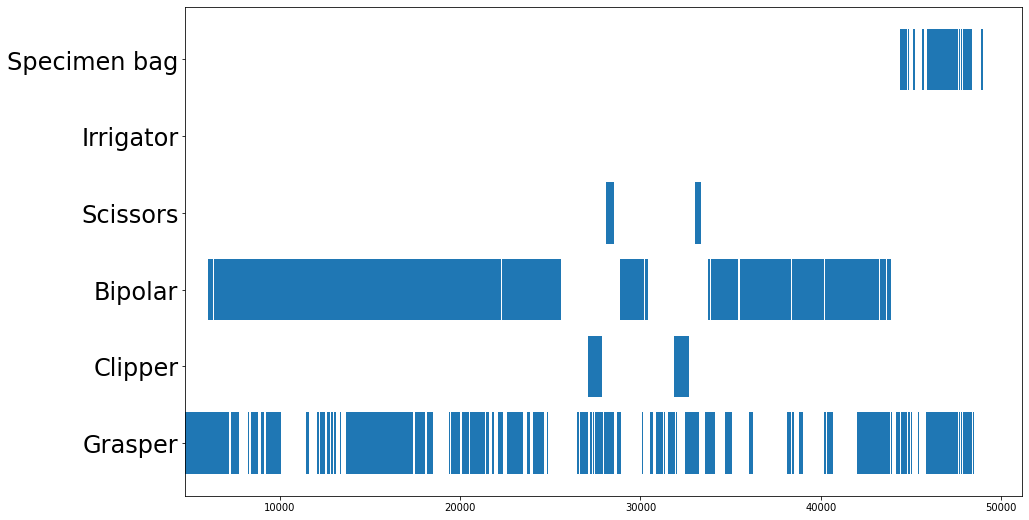

In [75]:
plt.figure(figsize=(15, 9))
plt.barh(y=v15_check['Task'], width=v15_check['Duration'], left=v15_check['Start'])
plt.yticks(range(0, 6), ["Grasper", "Clipper", "Bipolar", "Scissors", "Irrigator", "Specimen bag"], fontsize=24)
plt.savefig("../logs/figure/v15_gantt.png", transparent=True)

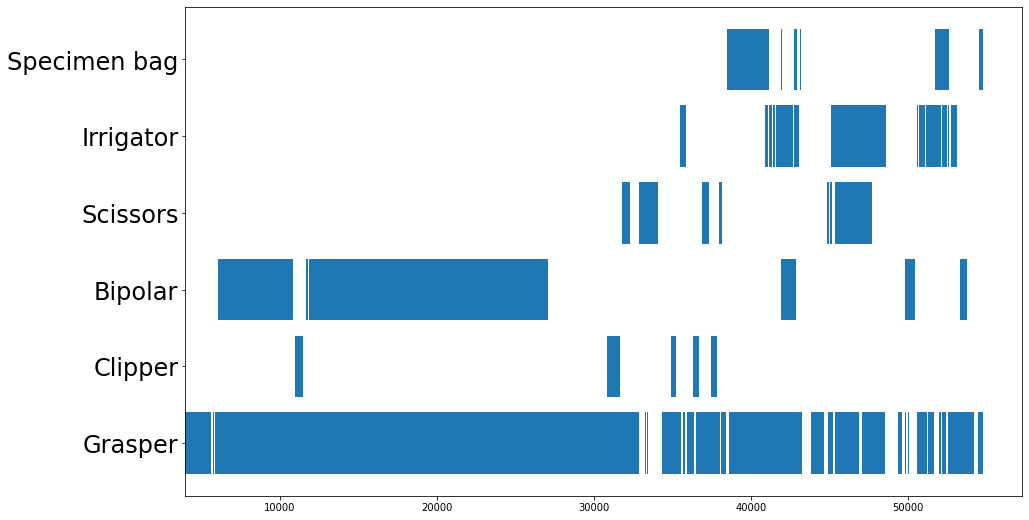

In [76]:
plt.figure(figsize=(15, 9))
plt.barh(y=v1_check['Task'], width=v1_check['Duration'], left=v1_check['Start'])
plt.yticks(range(0, 6), ["Grasper", "Clipper", "Bipolar", "Scissors", "Irrigator", "Specimen bag"],
           fontsize=24)
# plt.show()
plt.savefig("../logs/figure/v1_gantt.png", transparent=True)

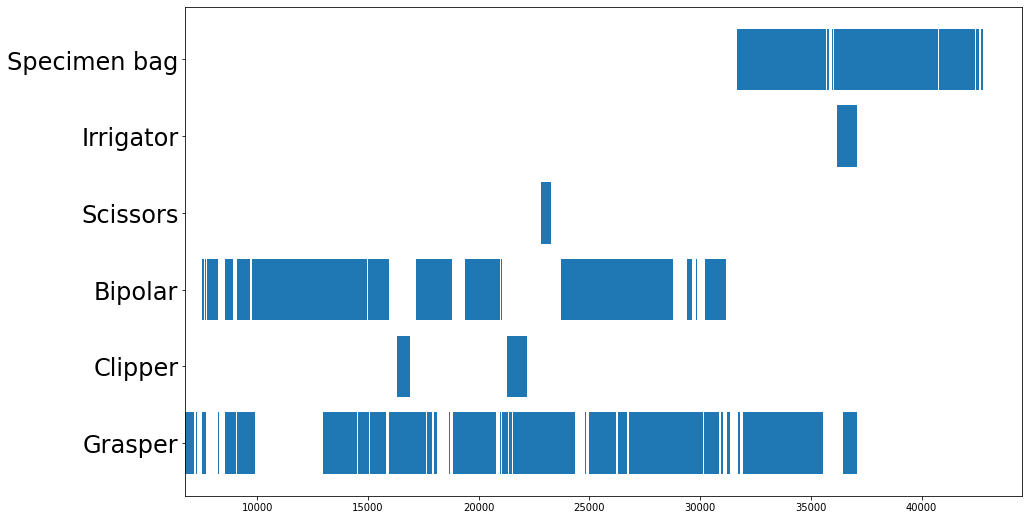

In [82]:
plt.figure(figsize=(15, 9))
plt.barh(y=v8_check['Task'], width=v8_check['Duration'], left=v8_check['Start'])
plt.yticks(range(0, 6), ["Grasper", "Clipper", "Bipolar", "Scissors", "Irrigator", "Specimen bag"], fontsize=24)
plt.savefig("../logs/figure/v8_gantt.png", transparent=True)

In [38]:
import plotly.figure_factory as ff
from datetime import datetime
import numpy as np

def convert_to_datetime(x):
  return datetime.fromtimestamp(31536000+x*24*3600).strftime("%Y-%d-%m")

df = [dict(Task="Job A", Start=convert_to_datetime(0), Finish=convert_to_datetime(4)),
      dict(Task="Job B", Start=convert_to_datetime(3), Finish=convert_to_datetime(6)),
      dict(Task="Job C", Start=convert_to_datetime(6), Finish=convert_to_datetime(10))]

num_tick_labels = np.linspace(start = 0, stop = 10, num = 11, dtype = int)
date_ticks = [convert_to_datetime(x) for x in num_tick_labels]

fig = ff.create_gantt(v1_post)
fig.layout.xaxis.update({
        'tickvals' : date_ticks,
        'ticktext' : num_tick_labels
        })
fig.write_html('first_figure.html', auto_open=True)